# Work in progress

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from nibabel import trackvis
from dipy.tracking import utils

In [2]:
subj = 'F01_Adult'
dname = 'E:/Celine/Ferret_b2n/'+subj+'/'
ftrk = dname + 'tracto_F01_Adult_rot_den_modifiedgtab_21-0_hmmask.trk'
ffa = dname + 'tensor_fa_F01_Adult_rot_den_modifiedgtab_21-0_hmmask.nii.gz'

In [3]:
fa_img = nib.load(ffa)
fa = fa_img.get_data()
affine = fa_img.affine

In [4]:
streams, hdr = trackvis.read(ftrk,strict=True)
streamlines = [s[0] for s in streams]
streamlines = list(streamlines)

In [5]:
fmask = dname + 'Bizley2009.nii.gz' 
mask_img = nib.load(fmask)
mask = mask_img.get_data()

In [6]:
mask.shape

(160L, 120L, 80L)

In [7]:
fa.shape

(160L, 120L, 80L)

In [8]:
affineedited = np.zeros((4,4))
affineedited[0,0]=0.24
affineedited[1,1]=0.24
affineedited[2,2]=0.24
affineedited[3,3]=1

In [9]:
affineedited

array([[ 0.24,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.24,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.24,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ]])

In [12]:
from show_trk_result import show_results

show_results(streamlines, fa, np.eye(4))

In [62]:
# can't use until we have labels

M, grouping = utils.connectivity_matrix(streamlines, mask, affine=affineedited,
                                        return_mapping=True,
                                        mapping_as_streamlines=True)

In [76]:
labels = np.loadtxt(dname+'Bizley2009/bizleycorrespondance.txt',dtype=character)

In [118]:
labels[:,0]=labels[:,0].astype(int)

In [143]:
Mconc = M.nonzero()

In [138]:
Mconc = np.concatenate((M[1:13,1:13],M[21:24]),axis=1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

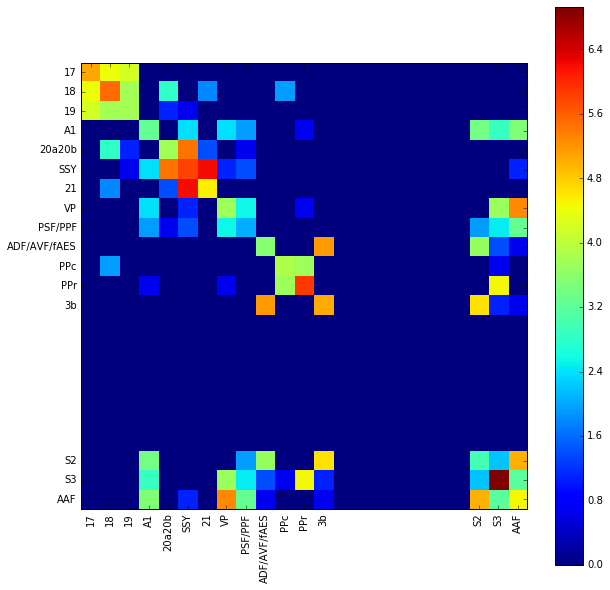

In [162]:
plt.figure(figsize=(10,10))
plt.imshow(np.log1p(M[1:,1:]), interpolation='nearest')
plt.xticks(labels[:,0].astype(int)-1,labels[:,1],rotation='vertical') #labels[:,0].astype(int)
plt.yticks(labels[:,0].astype(int)-1,labels[:,1])
plt.colorbar()
#plt.savefig(dname+"connectivity_-0.png")

In [124]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [119]:
labels

array([['1', '17'],
       ['2', '18'],
       ['3', '19'],
       ['4', 'A1'],
       ['5', '20a20b'],
       ['6', 'SSY'],
       ['7', '21'],
       ['8', 'VP'],
       ['9', 'PSF/PPF'],
       ['10', 'ADF/AVF/fAES'],
       ['11', 'PPc'],
       ['12', 'PPr'],
       ['13', '3b'],
       ['21', 'S2'],
       ['22', 'S3'],
       ['23', 'AAF']], 
      dtype='|S12')

In [62]:
# labels such as each voxel included in the mask is a roi

labels = mask.copy()

labels.shape
i=0

for z in range(mask.shape[2]):
    for y in range(mask.shape[1]):
        for index, item in enumerate(labels[:,y,z]):
            if item>0.0:
                i+=1
                labels[index,y,z]=i
labels = labels.astype(np.uint8)        